In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
mango_leaf_folder_path = '/content/drive/MyDrive/MangoLeafBD Dataset'

In [ ]:
import os

# List all subfolders and files inside "mango leafs"
for root, dirs, files in os.walk(mango_leaf_folder_path):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):  # Filter image files
            image_path = os.path.join(root, file)
            print(image_path)  # Print the full path of each image file


/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123359 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123327 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123305 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123548 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123338 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123346 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123341 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123405 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123331 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123529 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123310 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Dataset/Healthy/20211231_123156 (Custom).jpg
/content/drive/MyDrive/MangoLeafBD Datas

In [ ]:
from PIL import Image
import os

# Loop through the directory and load images
for root, dirs, files in os.walk(mango_leaf_folder_path):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(root, file)

            # Load the image
            image = Image.open(image_path)



In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Loop through the directory and load images
for root, dirs, files in os.walk(mango_leaf_folder_path):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(root, file)

            # Load image using OpenCV
            image = cv2.imread(image_path)

            # Convert from BGR (OpenCV default) to RGB for displaying with matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image using matplotlib
            plt.imshow(image_rgb)
            plt.axis('off')  # Hide axes
            plt.show()


Pre Proccessing (Resize image)

In [ ]:
from PIL import Image
import os

# Set the desired image size
image_size = (256, 256)

for root, dirs, files in os.walk(mango_leaf_folder_path):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(root, file)

            # Load the image
            image = Image.open(image_path)

            # Resize the image
            image = image.resize(image_size)

            # Display the image
            image.show()


EDA

In [ ]:
# Check the subfolders
subfolders = os.listdir(mango_leaf_folder_path)
print(f"Subfolders (classes): {subfolders}")

Subfolders (classes): ['Healthy', 'Die Back', 'Sooty Mould', 'Bacterial Canker', 'Powdery Mildew', 'Gall Midge', 'Anthracnose', 'Cutting Weevil']


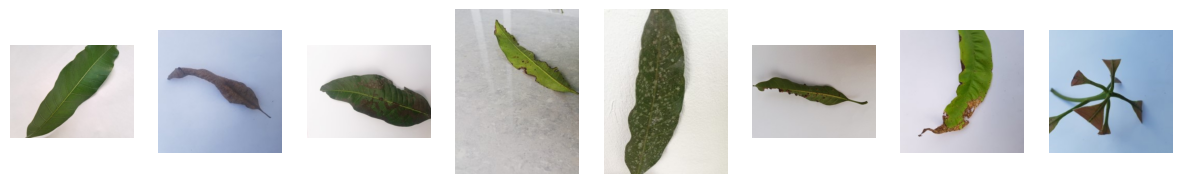

In [ ]:
import matplotlib.pyplot as plt
import random

# Load a few sample images from each subfolder
sample_images = []
for folder in subfolders:
    folder_path = os.path.join(mango_leaf_folder_path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    sample_image = random.choice(image_files)
    sample_images.append(os.path.join(folder_path, sample_image))

# Display sample images
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for ax, img_path in zip(axes, sample_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()


In [ ]:
# Get image dimensions
image_path = sample_images[0]
img = Image.open(image_path)
print(f"Image size: {img.size}")


Image size: (320, 240)


In [ ]:
# Count the number of images per class
class_counts = {folder: len(os.listdir(os.path.join(mango_leaf_folder_path, folder))) for folder in subfolders}
print("Class distribution (number of images per class):")
print(class_counts)


Class distribution (number of images per class):
{'Healthy': 500, 'Die Back': 500, 'Sooty Mould': 500, 'Bacterial Canker': 500, 'Powdery Mildew': 500, 'Gall Midge': 500, 'Anthracnose': 500, 'Cutting Weevil': 500}


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Resize images to a consistent size (e.g., 64x64)
image_size = (64, 64)

# List of images and their corresponding labels
image_data = []
labels = []

# Load images and labels
for folder in subfolders:
    folder_path = os.path.join(mango_leaf_folder_path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path)
        img = img.resize(image_size)
        img_array = np.array(img).flatten()  # Flatten image to 1D vector

        image_data.append(img_array)
        labels.append(folder)

# Convert to numpy arrays
X = np.array(image_data)
y = np.array(labels)

# Encode labels (because models require numerical labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check shapes
print(f"Feature data shape: {X.shape}")
print(f"Labels shape: {y_encoded.shape}")


Feature data shape: (4000, 12288)
Labels shape: (4000,)


Evaluate and Compare Performance of Random Forest and Decision Tree


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier Performance:
Accuracy: 0.6825
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        91
           1       0.70      0.66      0.68       101
           2       0.93      1.00      0.96        93
           3       0.88      0.80      0.84        86
           4       0.46      0.51      0.49        90
           5       0.61      0.65      0.63       123
           6       0.67      0.68      0.68       104
           7       0.57      0.46      0.51       112

    accuracy                           0.68       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.68      0.68      0.68       800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 0.87875
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        91
           1       0.91      0.83      0.87       101
           2       0.98      1.00      0.99        93
           3       0.97      0.98      0.97        86
           4       0.72      0.81      0.76        90
           5       0.88      0.91      0.90       123
           6       0.92      0.85      0.88       104
           7       0.82      0.79      0.81       112

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



In [ ]:
# Compare accuracies
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")


Decision Tree Accuracy: 0.6825
Random Forest Accuracy: 0.87875
